In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv(r'data\train.csv')
test_data = pd.read_csv(r'data\test.csv')

In [4]:
train_data

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP
...,...,...,...,...,...,...,...,...,...,...
749995,749995,25,69,30,Clayey,Maize,8,16,6,28-28
749996,749996,37,64,58,Loamy,Sugarcane,38,8,20,17-17-17
749997,749997,35,68,59,Sandy,Ground Nuts,6,11,29,10-26-26
749998,749998,31,68,29,Red,Cotton,9,11,12,20-20


In [5]:
train_columns = set(train_data.columns)
test_columns = set(test_data.columns)

In [6]:
train_columns.difference(test_columns)

{'Fertilizer Name'}

In [7]:
list((train_data['Crop Type'].unique(), list(train_data['Crop Type'].value_counts())))

[array(['Sugarcane', 'Millets', 'Barley', 'Paddy', 'Pulses', 'Tobacco',
        'Ground Nuts', 'Maize', 'Cotton', 'Wheat', 'Oil seeds'],
       dtype=object),
 [85754, 78180, 69171, 68000, 66628, 65291, 65045, 64269, 64184, 62569, 60909]]

In [8]:
dict(train_data['Crop Type'].value_counts())

{'Paddy': np.int64(85754),
 'Pulses': np.int64(78180),
 'Cotton': np.int64(69171),
 'Tobacco': np.int64(68000),
 'Wheat': np.int64(66628),
 'Millets': np.int64(65291),
 'Barley': np.int64(65045),
 'Sugarcane': np.int64(64269),
 'Oil seeds': np.int64(64184),
 'Maize': np.int64(62569),
 'Ground Nuts': np.int64(60909)}

## Target Variable Analysis

In [8]:
train_data['Fertilizer Name'].isna().sum()

np.int64(0)

In [9]:
def distribution_plot(df, column):
    counts = df[column].value_counts()
    labels = counts.index.tolist()
    values = counts.values.tolist() 

    fig, ax = plt.subplots(1, 2, figsize=(16, 8))

    ax[0].pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    ax[0].set_title(f'{column} Distribution')

    bars = ax[1].bar(labels, values, color='royalblue', edgecolor='black')
    ax[1].set_title(f'{column} Counts')
    ax[1].set_xticks(range(len(labels)))
    ax[1].set_xticklabels(labels, rotation=45)
    plt.tight_layout()
    plt.show()


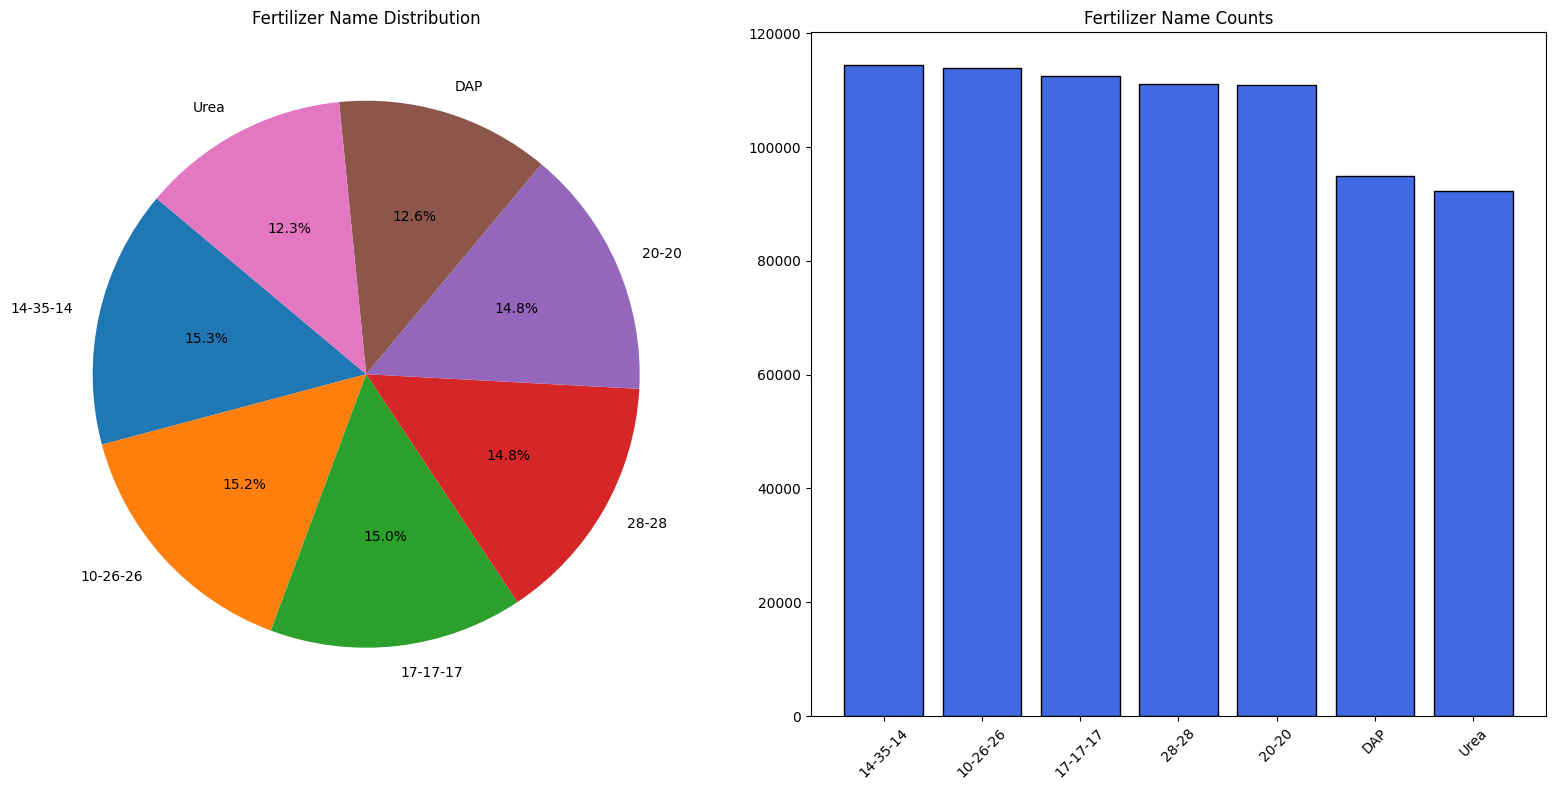

In [10]:
distribution_plot(train_data, 'Fertilizer Name')

## Categorical Columns Analysis

In [11]:
cat_columns = train_data.select_dtypes(include=['object', 'category']).columns

Null values in Soil Type: 0


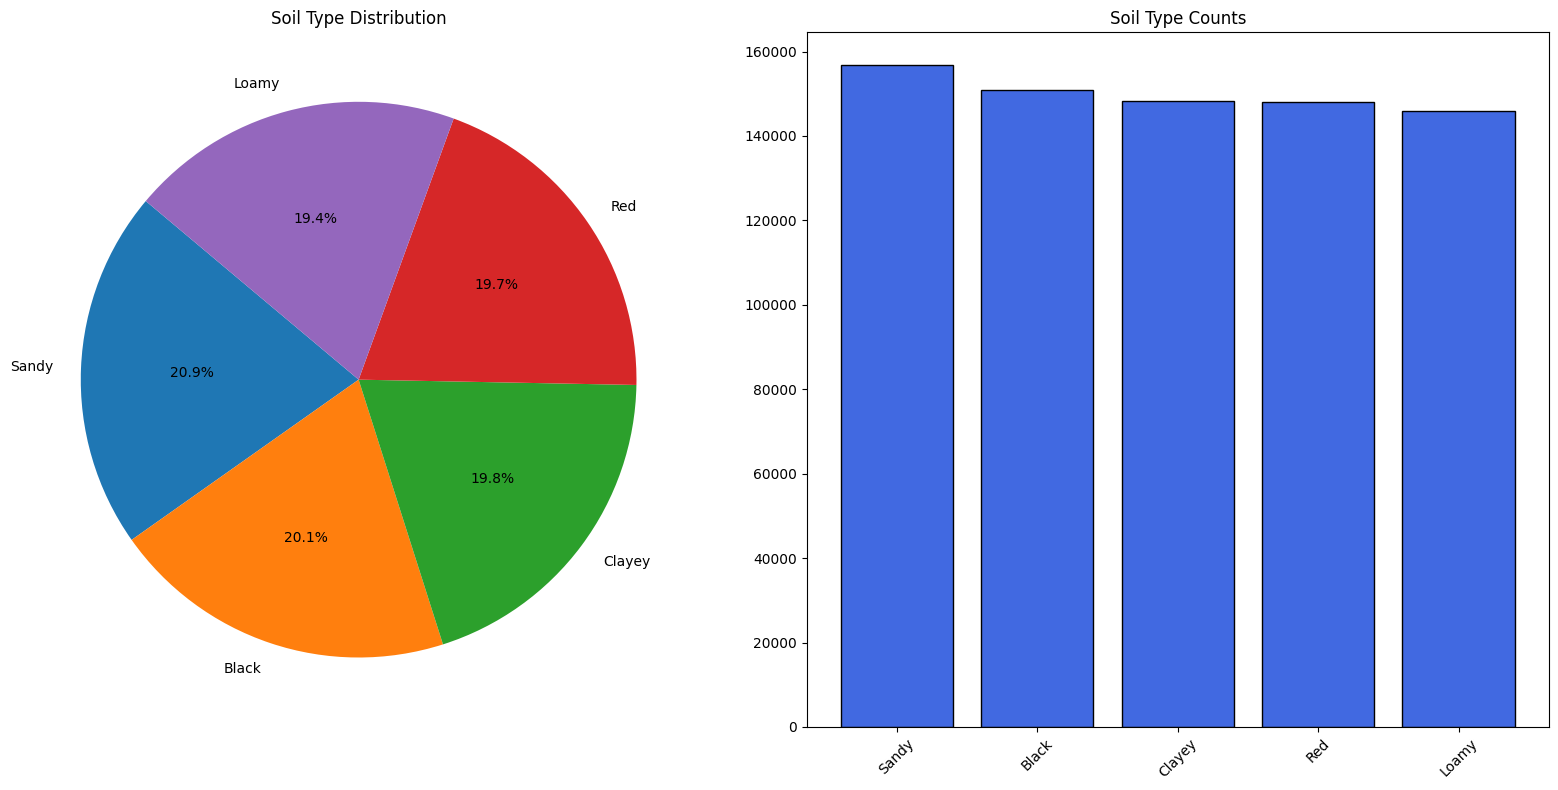

Null values in Crop Type: 0


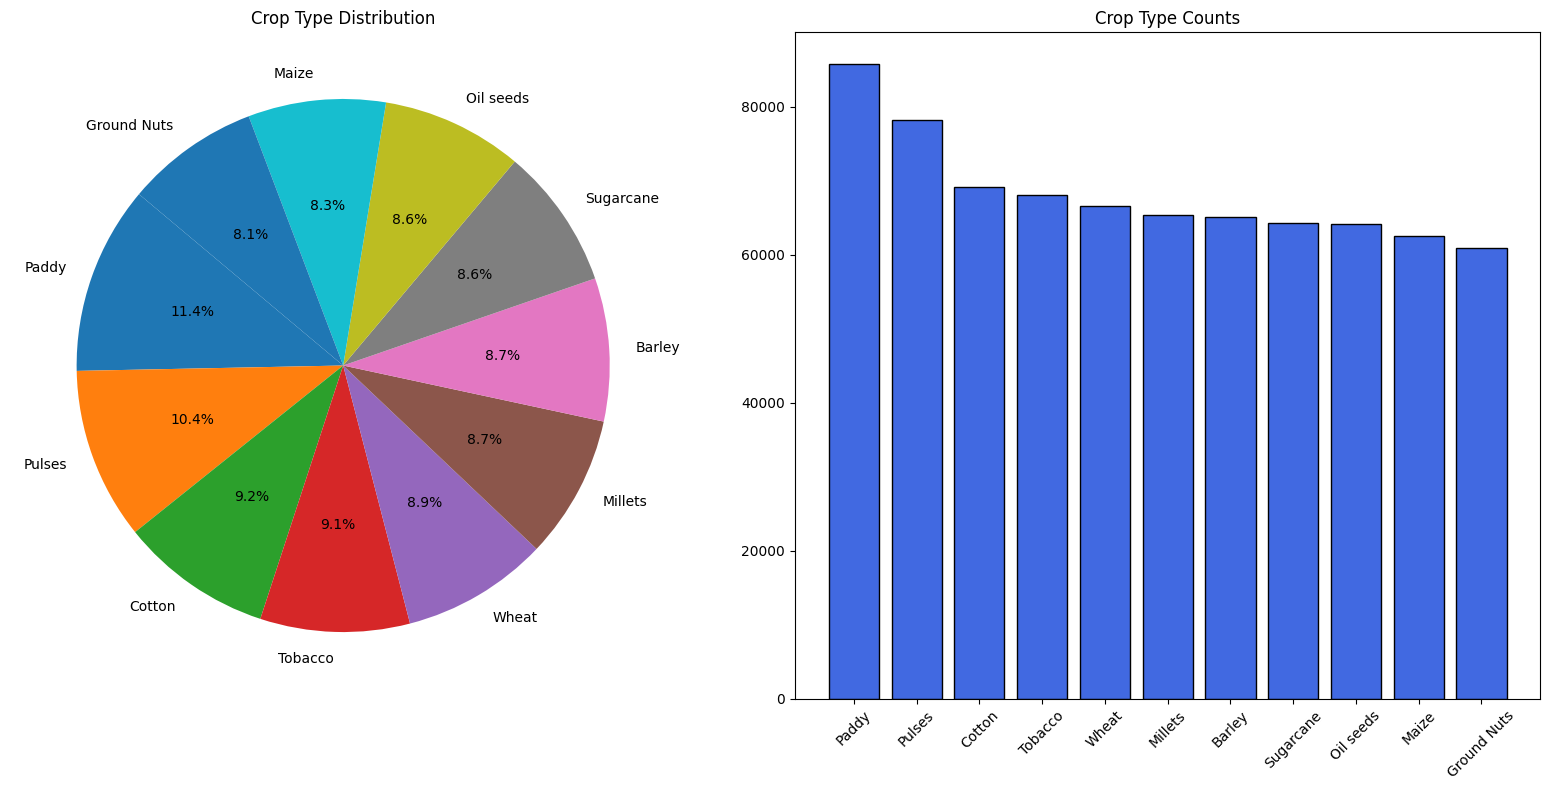

In [12]:
for cat in cat_columns[:2]:
    print(f'Null values in {cat}: {train_data[cat].isna().sum()}')
    distribution_plot(train_data, cat)

## Numerical Columns Analysis

In [13]:
num_columns = train_data.select_dtypes(include=['int64', 'int32', 'float16']).columns

In [14]:
num_columns = num_columns.drop('id')

In [21]:
def outskew(df, column: str):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    fig, ax = plt.subplots(1, 2, figsize=(16, 8))

    target = df[column].values
    skew = df[column].skew()

    ax[0].boxplot(target, vert=False)
    ax[0].set_title(f'Distribution Box Plot for {column}')

    
    sns.histplot(target, bins=len(df[column].unique()), kde=True, ax=ax[1], color='skyblue', edgecolor='navy', alpha=0.7)
    ax[1].axvline(np.mean(target), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(target):.4f}')
    ax[1].axvline(np.median(target), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(target):.4f}')
    ax[1].set_title(f'Distribution Histogram for {column}, Skew: {skew:.3f}', fontsize=14, pad=10)
    ax[1].set_xlabel('Target Value', fontsize=12)
    ax[1].set_ylabel('Frequency', fontsize=12)
    ax[1].legend(fontsize=10, framealpha=0.9)
    ax[1].grid(True, alpha=0.3)

    stats_text = f"""
    Min: {np.min(target):.2f}
    Q1: {Q1:.2f}
    Median: {np.median(target):.2f}
    Q3: {Q3:.2f}
    Max: {np.max(target):.2f}
    IQR: {IQR:.2f}
    Outliers: {len(outliers)}
    """
    ax[1].text(1.05, 0.5, stats_text, transform=ax[1].transAxes, 
               bbox=dict(facecolor='white', alpha=0.8), fontsize=10)

    plt.tight_layout()
    plt.show()


Null values in Temparature: 0


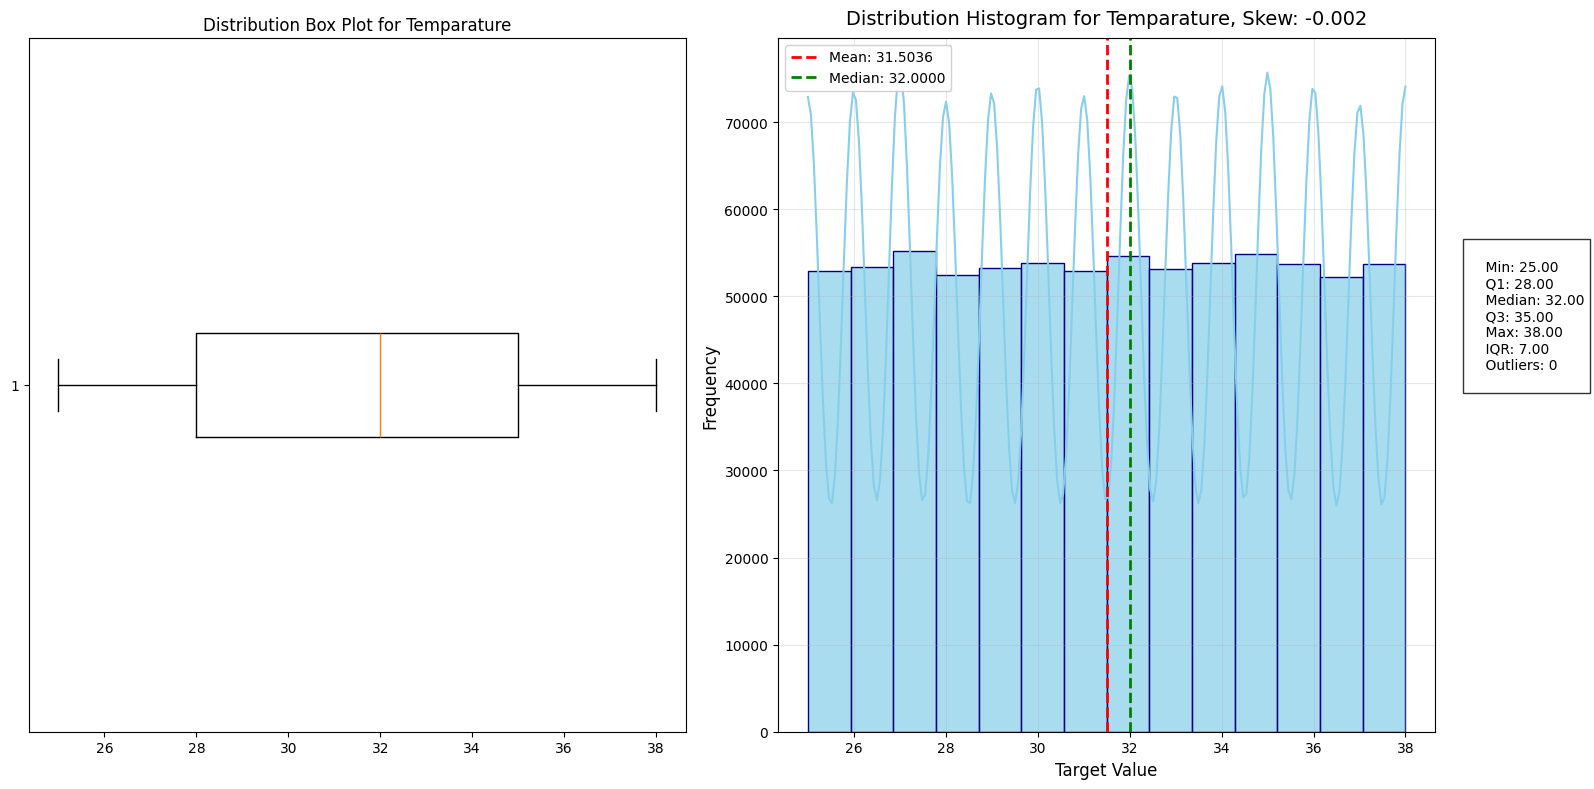

Null values in Humidity: 0


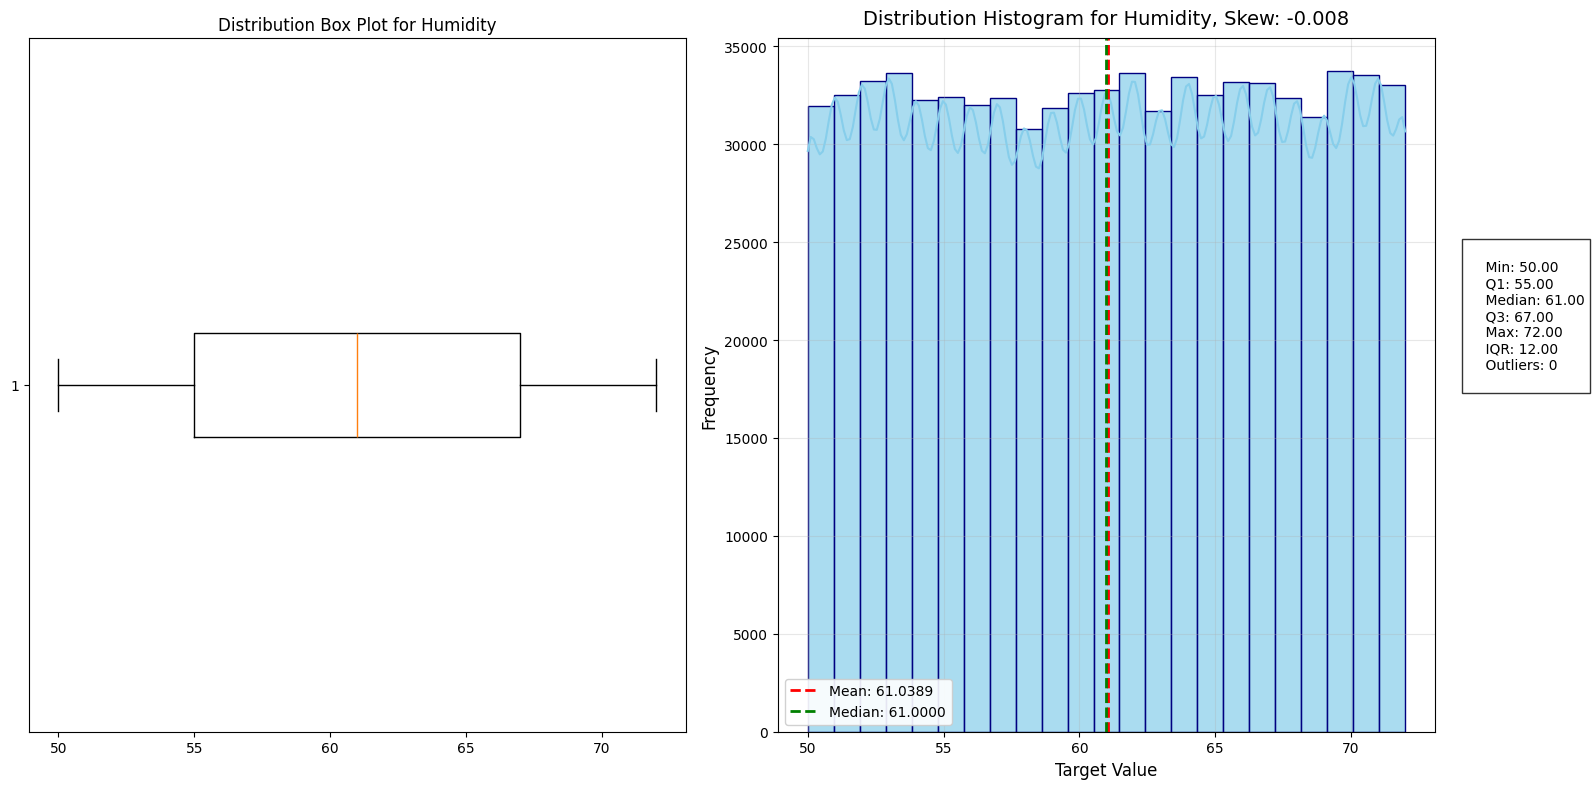

Null values in Moisture: 0


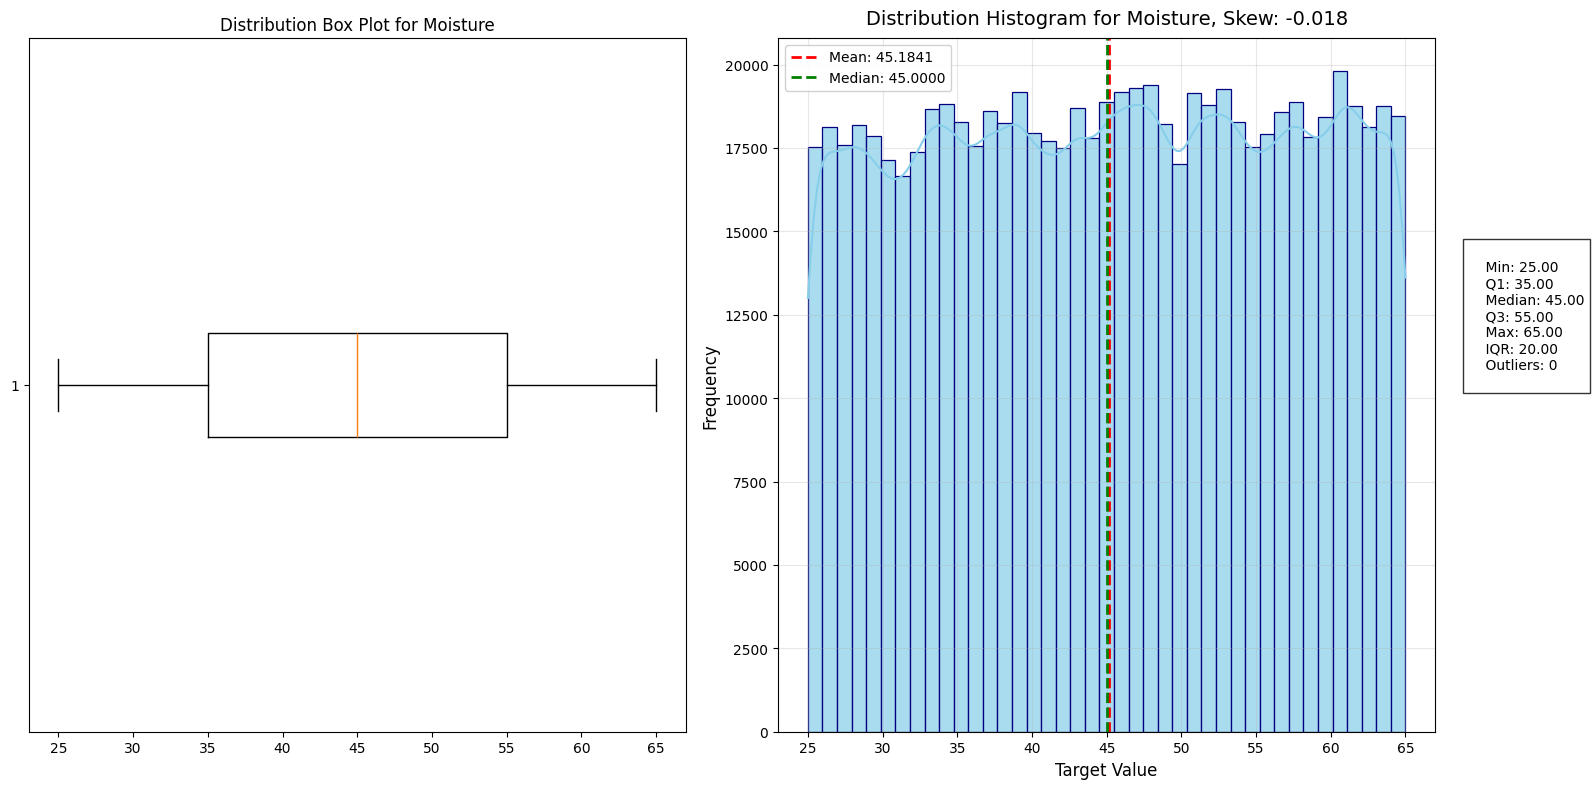

Null values in Nitrogen: 0


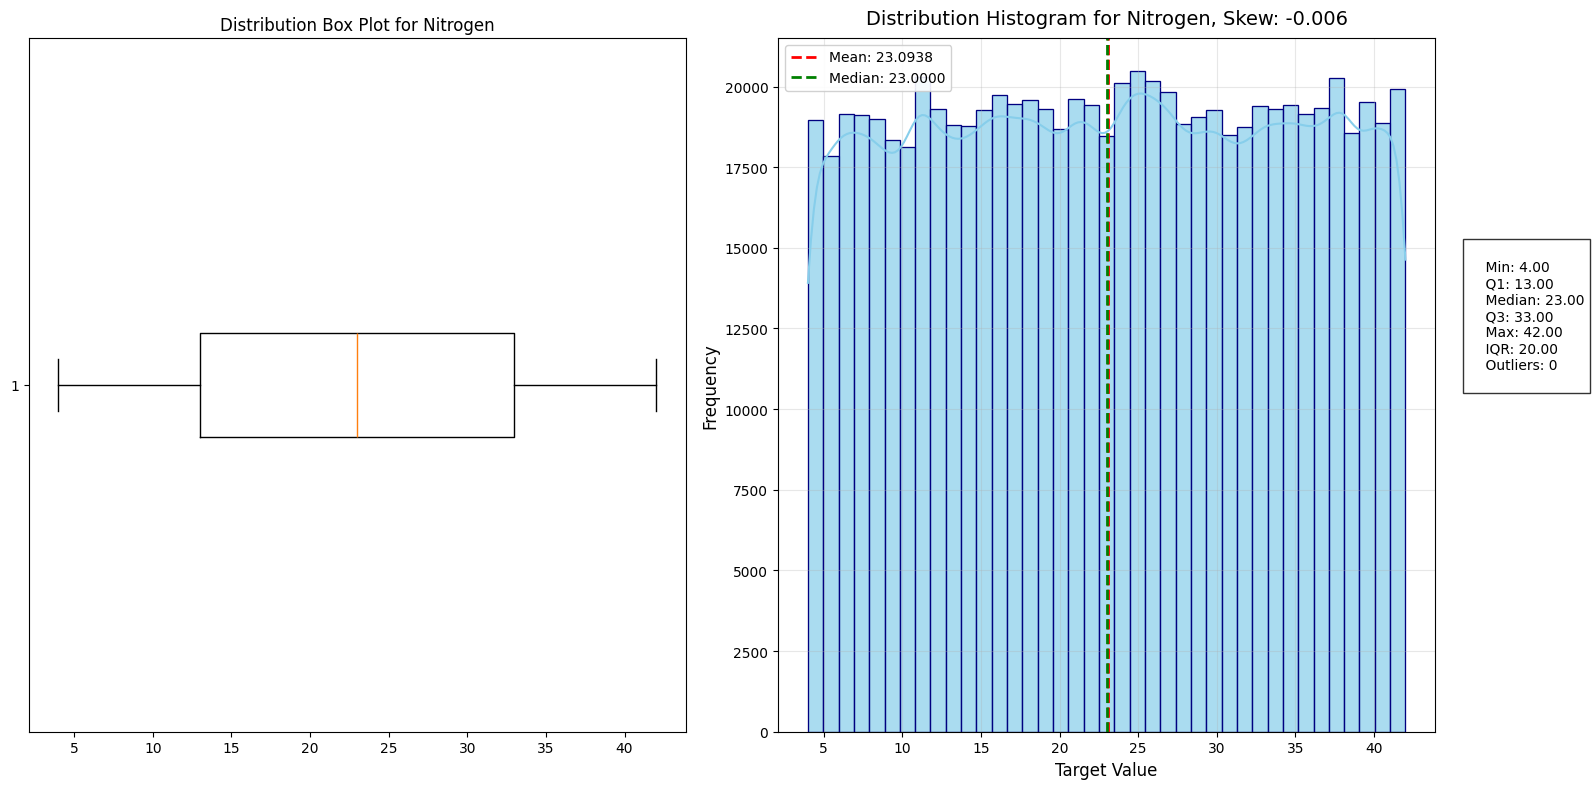

Null values in Potassium: 0


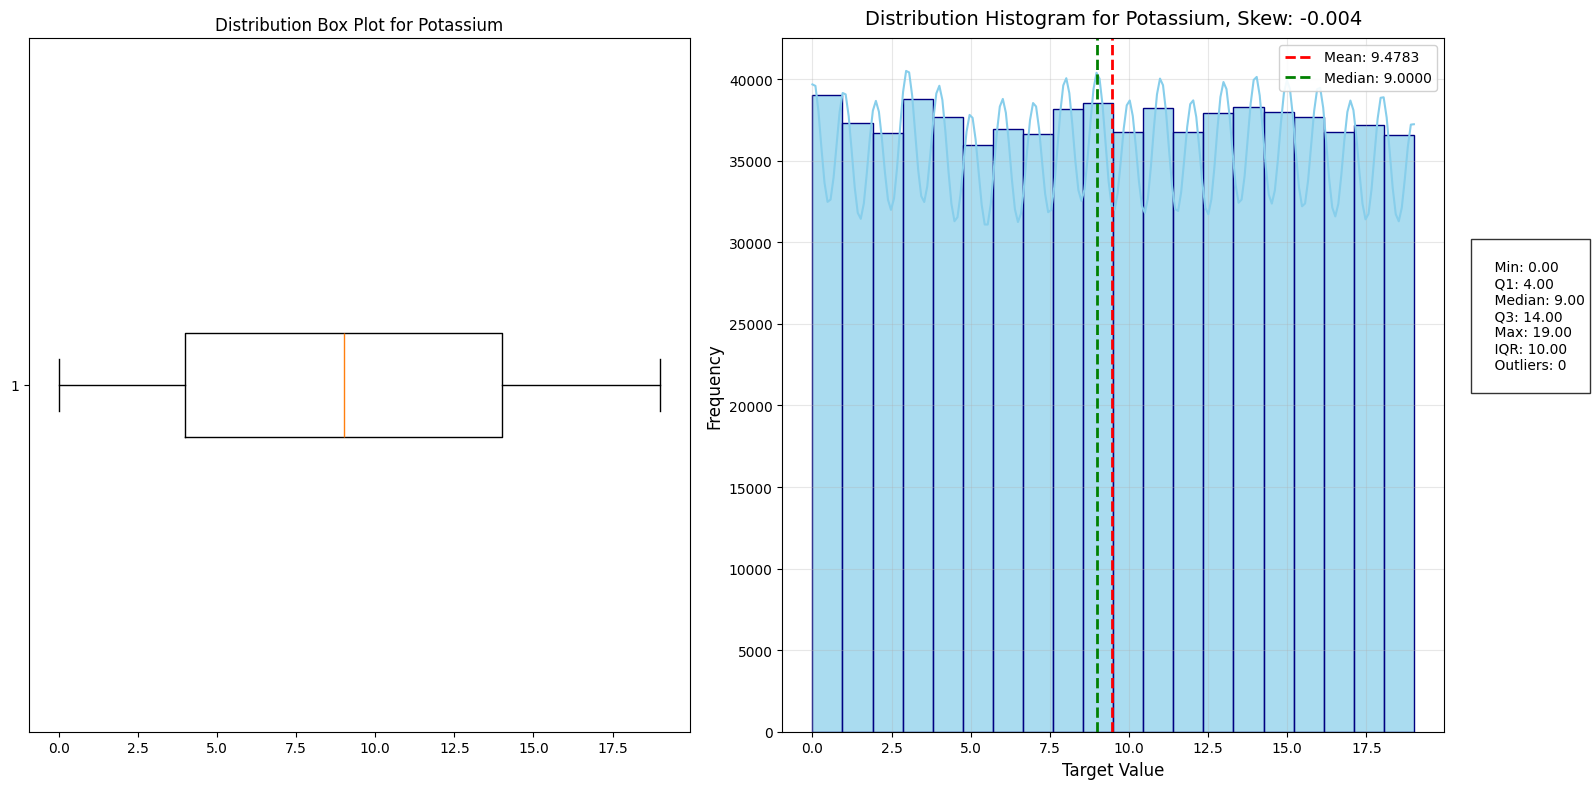

Null values in Phosphorous: 0


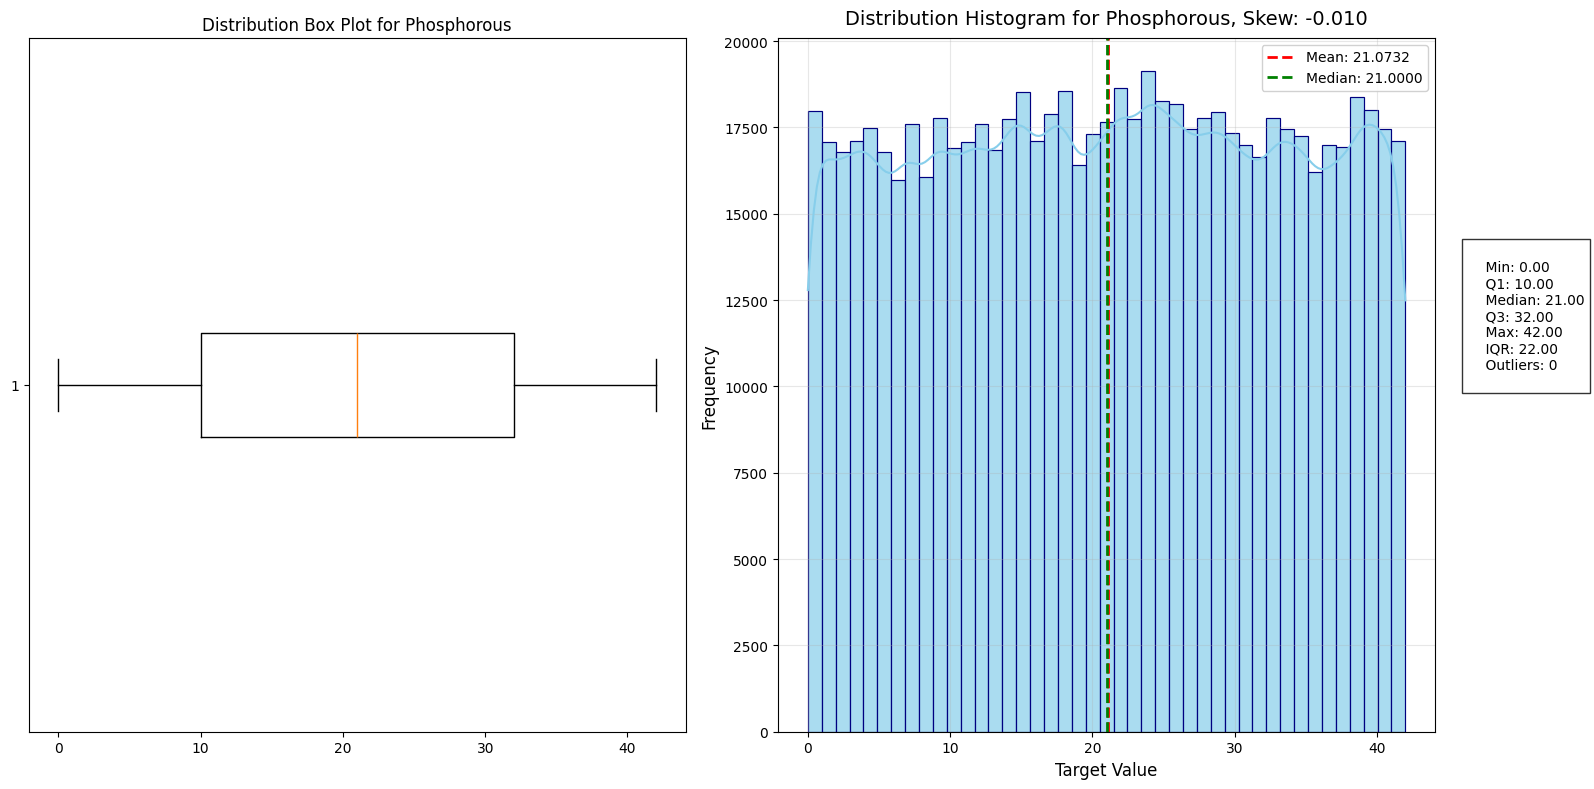

In [22]:
for num in num_columns:
    print(f'Null values in {num}: {train_data[num].isna().sum()}')
    outskew(train_data, num)

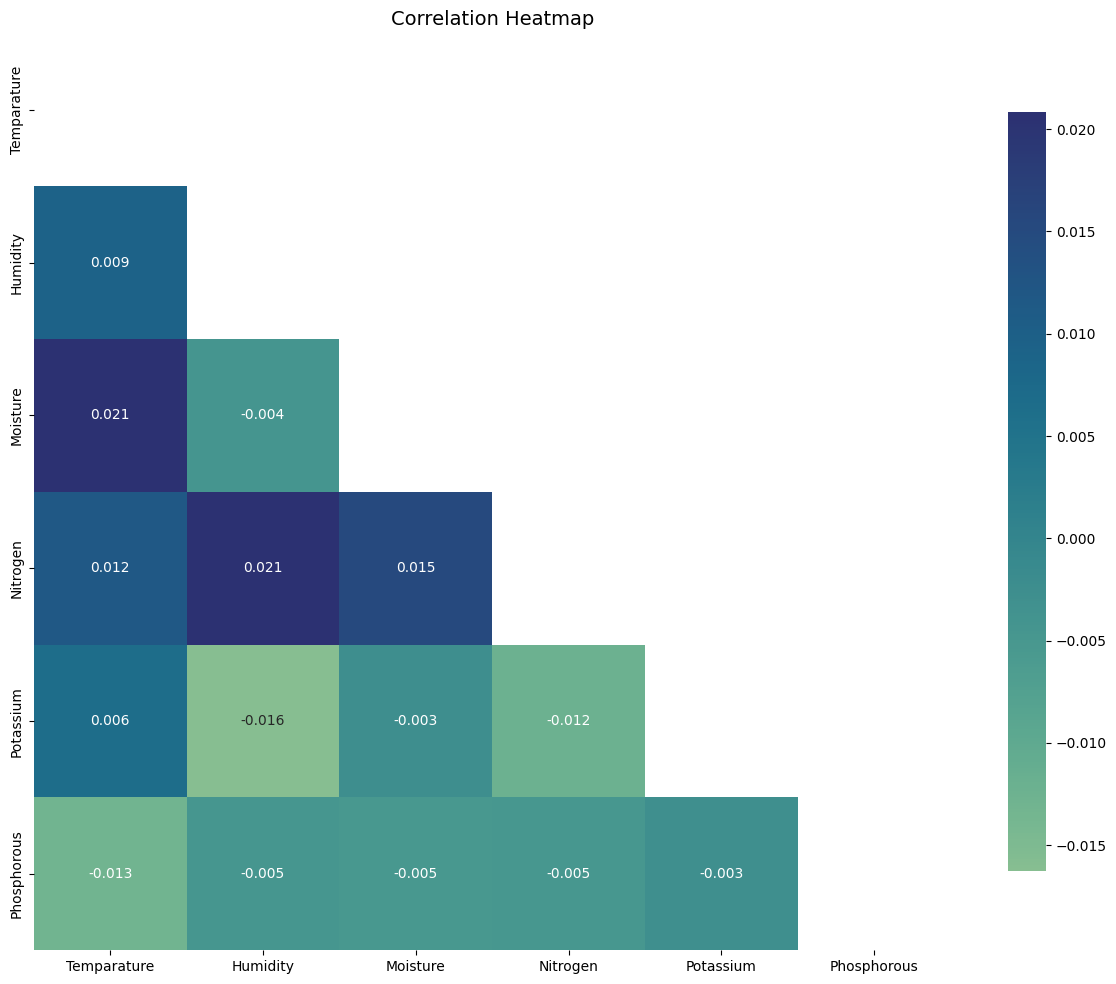

In [24]:
sample_data = train_data[num_columns].sample(n=5000, random_state=42)

correlation_matrix = sample_data.corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='crest', 
            center=0,
            square=True, 
            fmt='.3f',
            cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()